In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  

In [7]:
# Load CSV file
data = pd.read_csv('mnist_train.csv')

# Prepare data
labels = data['label'].copy().to_numpy()
features = data.drop('label', axis=1).to_numpy()

In [8]:
# Split data into a train and a test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [9]:
# perform random forest classification with default values: test_size=0.2, n_estimators=100

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train classifier
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9718333333333333


misclassified_indices: [31, 47, 60, 180, 222, 231, 248, 287, 295, 404, 439, 454, 461, 463, 485, 590, 642, 645, 659, 673, 682, 727, 729, 758, 763, 845, 868, 897, 919, 994, 1021, 1040, 1056, 1081, 1103, 1124, 1149, 1159, 1173, 1184, 1192, 1302, 1343, 1362, 1384, 1433, 1436, 1455, 1537, 1643, 1659, 1688, 1707, 1789, 1807, 1964, 1974, 2053, 2060, 2073, 2122, 2243, 2344, 2419, 2425, 2441, 2454, 2492, 2505, 2527, 2549, 2585, 2591, 2600, 2607, 2610, 2665, 2716, 2753, 2839, 2879, 2901, 2921, 2956, 2957, 2984, 3017, 3063, 3082, 3093, 3136, 3139, 3148, 3157, 3176, 3200, 3212, 3223, 3265, 3280, 3294, 3357, 3385, 3420, 3458, 3464, 3611, 3652, 3762, 3828, 3894, 3922, 3990, 4000, 4075, 4107, 4141, 4180, 4203, 4235, 4236, 4250, 4303, 4334, 4392, 4407, 4413, 4432, 4442, 4460, 4502, 4506, 4508, 4609, 4611, 4645, 4699, 4755, 4769, 4952, 4975, 4996, 5027, 5108, 5155, 5170, 5176, 5211, 5235, 5236, 5250, 5262, 5301, 5347, 5365, 5416, 5427, 5436, 5597, 5598, 5698, 5728, 5729, 5751, 5761, 5937, 5947, 5956, 5

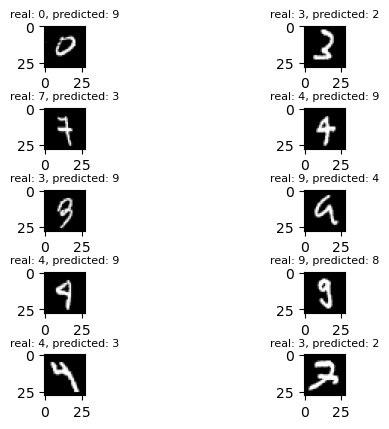

In [5]:
# get missclassified data
import matplotlib.pyplot as plt
import random

# y_test: correct label
# y_pred: predicited label

# Find indices where predicted labels don't match the true labels
misclassified_indices = [i for i in range(len(y_test)) if y_pred[i] != y_test[i]]

print(f"misclassified_indices: {misclassified_indices}")
print(f"number of misclassified images: {len(misclassified_indices)}")
print(f"number of test images: {len(y_test)}")
print(f"accuracy: {1- len(misclassified_indices) / len(y_test)}")


random_misclassified_indices = random.sample(misclassified_indices, k=10)
i=1

for id in random_misclassified_indices:
    image = X_test[id].reshape(28, 28)
    label = "real: " + str(y_test[id]) + ", predicted: " + str(y_pred[id])
    plt.subplot(5,2,i)
    plt.imshow(image, cmap='gray')
    plt.title("{}".format(label),fontsize=8)
    plt.subplots_adjust(hspace=1, wspace=0.1)
    i+=1
    
   
plt.show()
